In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
import os
import json
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
import folium
from tqdm import trange, tqdm

from polygon_compare import *

In [70]:
cities = [
    # 'Ordu',
    # 'Manisa',
    # 'Adana',
    # 'Cairo',
    # 'Trabzon',
    
    'Johannesburg',
]

for c in cities:
    city_osm = os.path.join("data","OSM",f"{c}.pkl")
    df_osm = pickle.load(open(city_osm,"rb"))
    df_osm_b = df_osm[df_osm["type"]=="way"]
    
    city_osmb = os.path.join("data","OSMB",f"{c}.pkl")
    df_osmb = pickle.load(open(city_osmb,"rb"))
    df_osmb = df_osmb.set_crs('EPSG:4326')
    
    print(df_osmb.shape)

    df = compare_geodf2(df_osmb, df_osm_b, match_one=True)
    df.plot()
    df.to_pickle(f'{c}_combined_osm.pkl')

(123426, 19)


92it [06:31,  4.26s/it]426 [06:29<142:56:43,  4.17s/it]
  0%|          | 92/123426 [06:31<145:46:53,  4.26s/it]


KeyboardInterrupt: 

(127528, 5)


<AxesSubplot:>

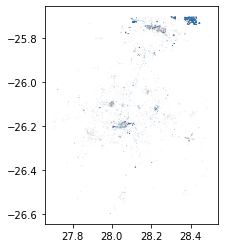

In [73]:
print(df_osm_b.shape)
df_osm_b.plot()

(123426, 19)


<AxesSubplot:>

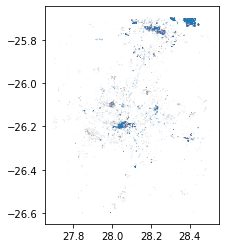

In [74]:
print(df_osmb.shape)
df_osmb.plot()

In [76]:
from utils import run_mp

In [79]:
def add_1(l):
    ll=[]
    for i in l:
        ll.append(i+1)
    return ll

In [83]:
run_mp(add_1,[[1,2,3]]*10)

 10%|█         | 1/10 [00:00<00:01,  8.52it/s]


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

SyntaxError: illegal target for annotation (3430622773.py, line 1)